In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print("Iris Dataset Overview:")
print(iris_df.head())

Iris Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


Data Loading and Preparation :

Loads the Iris dataset from sklearn and converts it into a Pandas DataFrame for easier manipulation. Contains species labels (Setosa, Versicolor, Virginica) in numeric values.

In [48]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print(df.head())

setosa_petal_length = df[df['species'] == 'setosa']['petal_length']
virginica_petal_length = df[df['species'] == 'virginica']['petal_length']

t_stat, p_value = ttest_ind(setosa_petal_length, virginica_petal_length)

print("\nT-Test Results (Setosa vs. Virginica - Petal Length):")
print("H0: The mean petal lengths of Setosa and Virginica are equal.")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

T-Test Results (Setosa vs. Virginica - Petal Length):
H0: The mean petal lengths of Setosa and Virginica are equal.
T-statistic: -49.98618625709594, P-value: 1.5048006992427275e-71


Renames the columns for better clarity.
1. T-Test :

1) Compare Setosa and Virginica mean petal lengths.

2) The Null Hypothesis (H0) is the mean of the petal length of the Setosa and Virginica is equal.

3) Extract petal lengths of setosa and virginica and then
Perform an independent T-test.

The results are :

t_stat : It measures the difference in means with respect to their variability.

p_value: It tells if the result is statistically significant.


In [49]:
versicolor_sepal_length = df[df['species'] == 'versicolor']['sepal_length']
population_std = np.std(versicolor_sepal_length)

z_stat = (versicolor_sepal_length.mean() - 5.0) / (population_std / np.sqrt(len(versicolor_sepal_length)))
print("\nZ-Test Results (Versicolor Sepal Length):")
print("H0: The mean sepal length of Versicolor equals 5.0.")
print(f"Z-statistic: {z_stat}")


Z-Test Results (Versicolor Sepal Length):
H0: The mean sepal length of Versicolor equals 5.0.
Z-statistic: 12.952514536592439


2. Z-Test :

1) Test if the mean sepal length of Versicolor equals 5.0.

2) The Null Hypothesis (H0) is the mean sepal length of Versicolor equals 5.0.

3) Extract Versicolor sepal lengths then Calculate Z-statistic.

Z-statistic tests whether the sample mean differs from a known value (5.0 in this case).

In [50]:
setosa_petal_width = df[df['species'] == 'setosa']['petal_width']
versicolor_petal_width = df[df['species'] == 'versicolor']['petal_width']
virginica_petal_width = df[df['species'] == 'virginica']['petal_width']

anova_stat, anova_p_value = f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

print("\nANOVA Results (Petal Width Across Species):")
print("H0: The mean petal widths are equal across all three species.")
print(f"F-statistic: {anova_stat}, P-value: {anova_p_value}")


ANOVA Results (Petal Width Across Species):
H0: The mean petal widths are equal across all three species.
F-statistic: 960.007146801809, P-value: 4.169445839443116e-85


3. ANOVA :

1) Compare the average petal width across the three species.

2) The Null Hypothesis (H0) is The average petal width is the same across all Setosa, Versicolor, and Virginica.

First Extract the petal width for the three species then perform ANOVA test.

The results are:

anova_stat:
The F-statistic measures variance between groups compared to variance within groups.

p_value:
Determines whether differences are statistically significant.



Correlation between Sepal Length and Petal Length:
Pearson Correlation Coefficient: 0.8717537758865831

Regression Results (Sepal Length vs Petal Length):
                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.04e-47
Time:                        22:30:53   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|

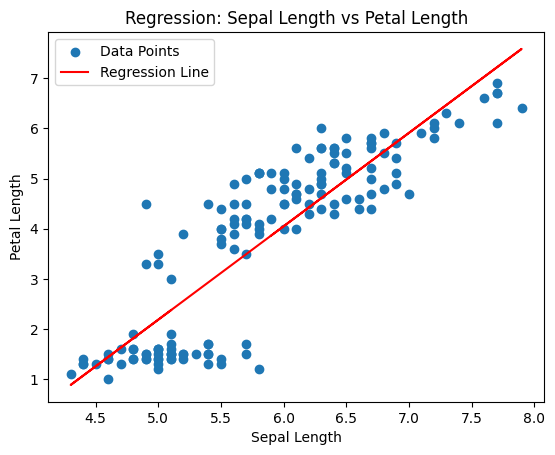

In [51]:
sepal_length = df['sepal_length']
petal_length = df['petal_length']

correlation, _ = pearsonr(sepal_length, petal_length)
print("\nCorrelation between Sepal Length and Petal Length:")
print(f"Pearson Correlation Coefficient: {correlation}")

X = sm.add_constant(sepal_length)
model = sm.OLS(petal_length, X).fit()

print("\nRegression Results (Sepal Length vs Petal Length):")
print(model.summary())

plt.scatter(sepal_length, petal_length, label='Data Points')
plt.plot(sepal_length, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Regression: Sepal Length vs Petal Length')
plt.legend()
plt.show()

4. Correlation and Regression:

1) Correlation:

Investigate the relationship between sepal length and petal length.
Pearson Correlation gives information about linear correlation, ranging from -1 to +1.

2) Regression:

Use a simple linear regression to predict petal length from sepal length
Prepare data for regression then
show regression results provides coefficients, significance levels, and fit metrics. Plot regression plots the relationship and fit.
